### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [11]:
#Calculamos la facturación de cada tienda suponiendo que cada liena es una venta

facturacion_tienda1 = round(sum(tienda['Precio'])/1000000,1)
facturacion_tienda2 = round(sum(tienda2['Precio'])/1000000,1)
facturacion_tienda3 = round(sum(tienda3['Precio'])/1000000,1)
facturacion_tienda4 = round(sum(tienda4['Precio'])/1000000,1)

print('Facturación total por tienda en millones:')
print(f'Facturación de la tienda 1: {facturacion_tienda1}')
print(f'Facturación de la tienda 2: {facturacion_tienda2}')
print(f'Facturación de la tienda 3: {facturacion_tienda3}')
print(f'Facturación de la tienda 4: {facturacion_tienda4}')


Facturación total por tienda en millones:
Facturación de la tienda 1: 1150.9
Facturación de la tienda 2: 1116.3
Facturación de la tienda 3: 1098.0
Facturación de la tienda 4: 1038.4


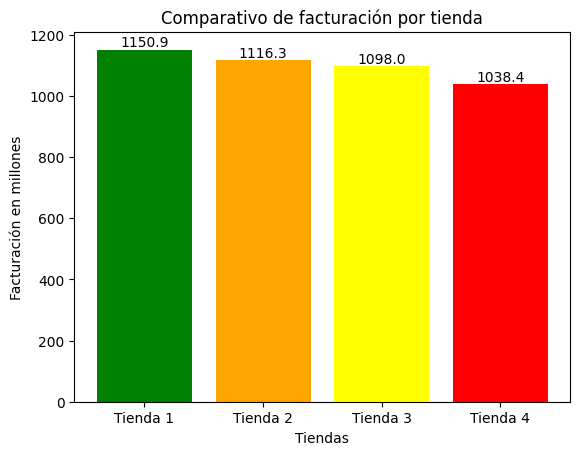

In [28]:
#Creamos un grafico de barras para comparar la facturación (ingresos) de las tiendas

import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturaciones = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

plt.bar(tiendas, facturaciones, color = ['green','orange', 'yellow','red'])

plt.title('Comparativo de facturación por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación en millones')

for i, valor in enumerate(facturaciones):
    plt.text(i, valor + 0.1, f'{valor}', ha = 'center', va = 'bottom')

plt.show()

# 2. Ventas por categoría

In [42]:
#calculamos las ventas por categoria por tienda suponiendo que cada linea es una venta
venta_categoria_tienda1 = tienda['Categoría del Producto'].value_counts()
venta_categoria_tienda2 = tienda2['Categoría del Producto'].value_counts()
venta_categoria_tienda3 = tienda3['Categoría del Producto'].value_counts()
venta_categoria_tienda4 = tienda4['Categoría del Producto'].value_counts()


#calculamos el peso de cada categoria sobre el total de las ventas
porcentaje_tienda1 = round(venta_categoria_tienda1 / sum(venta_categoria_tienda1)*100,1)
porcentaje_tienda2 = round(venta_categoria_tienda2 / sum(venta_categoria_tienda2)*100,1)
porcentaje_tienda3 = round(venta_categoria_tienda3 / sum(venta_categoria_tienda3)*100,1)
porcentaje_tienda4 = round(venta_categoria_tienda4 / sum(venta_categoria_tienda4)*100,1)


#creamos tablas para combinar las ventas y el %
tabla_tienda1 = pd.DataFrame({ 'Ventas': venta_categoria_tienda1, 'Porcentaje': porcentaje_tienda1})
tabla_tienda2 = pd.DataFrame({ 'Ventas': venta_categoria_tienda2, 'Porcentaje': porcentaje_tienda2})
tabla_tienda3 = pd.DataFrame({ 'Ventas': venta_categoria_tienda3, 'Porcentaje': porcentaje_tienda3})
tabla_tienda4 = pd.DataFrame({ 'Ventas': venta_categoria_tienda4, 'Porcentaje': porcentaje_tienda4})

print('Ventas por categoría de productos:')
print(f'Ventas de la tienda 1: \n{tabla_tienda1}')
print(f'Ventas de la tienda 2: \n{tabla_tienda2}')
print(f'Ventas de la tienda 3: \n{tabla_tienda3}')
print(f'Ventas de la tienda 4: \n{tabla_tienda4}')

Ventas por categoría de productos:
Ventas de la tienda 1: 
                         Ventas  Porcentaje
Categoría del Producto                     
Muebles                     465        19.7
Electrónicos                448        19.0
Juguetes                    324        13.7
Electrodomésticos           312        13.2
Deportes y diversión        284        12.0
Instrumentos musicales      182         7.7
Libros                      173         7.3
Artículos para el hogar     171         7.2
Ventas de la tienda 2: 
                         Ventas  Porcentaje
Categoría del Producto                     
Muebles                     442        18.7
Electrónicos                422        17.9
Juguetes                    313        13.3
Electrodomésticos           305        12.9
Deportes y diversión        275        11.7
Instrumentos musicales      224         9.5
Libros                      197         8.4
Artículos para el hogar     181         7.7
Ventas de la tienda 3: 
             

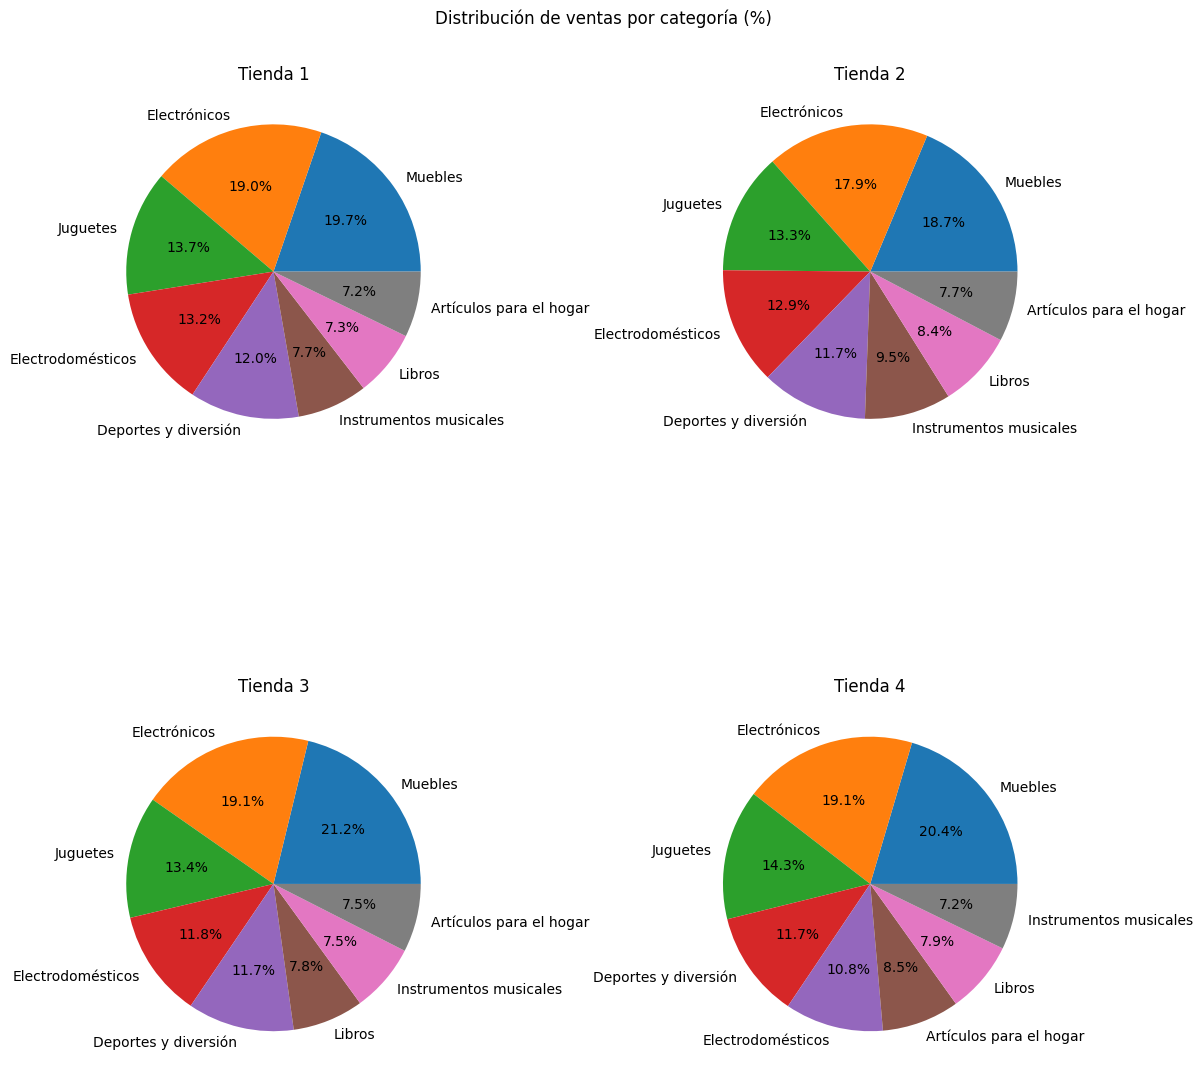

In [66]:
#creamos 4 espacios para poder comparar mejor
fig, axs = plt.subplots(2, 2, figsize = (12,12))
fig.suptitle('Distribución de ventas por categoría (%)')

#creamos los 4 graficos
tabla_tienda1['Porcentaje'].plot(kind = 'pie', autopct = '%1.1f%%', ax = axs[0,0])
axs[0,0].set_title('Tienda 1')
axs[0,0].set_ylabel('')

tabla_tienda2['Porcentaje'].plot(kind = 'pie', autopct = '%1.1f%%', ax = axs[0,1])
axs[0,1].set_title('Tienda 2')
axs[0,1].set_ylabel('')

tabla_tienda3['Porcentaje'].plot(kind = 'pie', autopct = '%1.1f%%', ax = axs[1,0])
axs[1,0].set_title('Tienda 3')
axs[1,0].set_ylabel('')

tabla_tienda4['Porcentaje'].plot(kind = 'pie', autopct = '%1.1f%%', ax = axs[1,1])
axs[1,1].set_title('Tienda 4')
axs[1,1].set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(top = 1.0)
plt.show()


# 3. Calificación promedio de la tienda


In [69]:
#se calcula el promedio de las clasificaciones de los clientes
calificacion_tienda1 = round(tienda['Calificación'].mean(),2)
calificacion_tienda2 = round(tienda2['Calificación'].mean(),2)
calificacion_tienda3 = round(tienda3['Calificación'].mean(),2)
calificacion_tienda4 = round(tienda4['Calificación'].mean(),2)

print(f'Calificación promedio de la tienda 1: {calificacion_tienda1}')
print(f'Calificación promedio de la tienda 2: {calificacion_tienda2}')
print(f'Calificación promedio de la tienda 3: {calificacion_tienda3}')
print(f'Calificación promedio de la tienda 4: {calificacion_tienda4}')


Calificación promedio de la tienda 1: 3.98
Calificación promedio de la tienda 2: 4.04
Calificación promedio de la tienda 3: 4.05
Calificación promedio de la tienda 4: 4.0


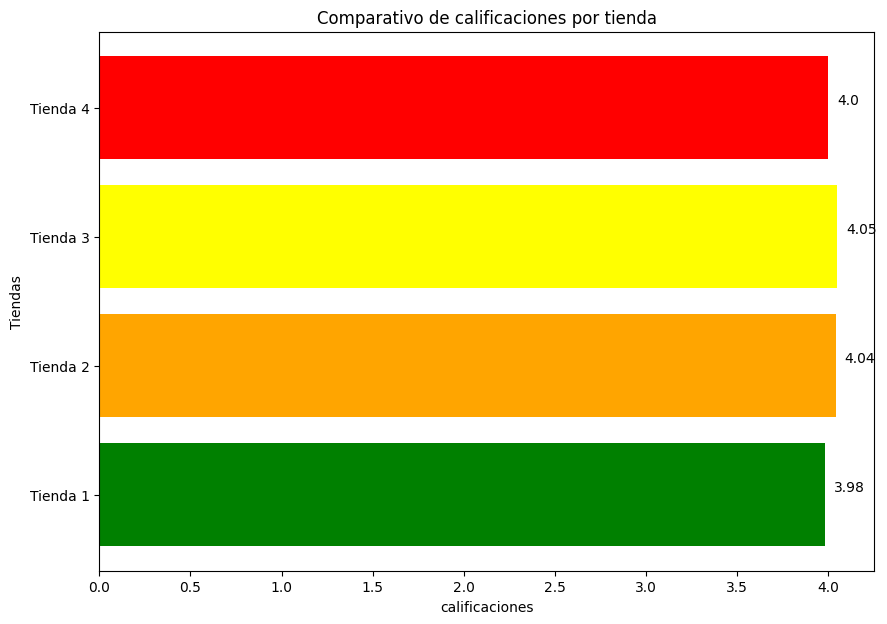

In [81]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]

plt.figure(figsize = (10,7))
plt.barh(tiendas, calificaciones, color = ['green','orange', 'yellow','red'])


plt.title('Comparativo de calificaciones por tienda')
plt.ylabel('Tiendas')
plt.xlabel('calificaciones')

for i, valor in enumerate(calificaciones):
    plt.text(valor + 0.05, i ,f'{valor}', va = 'bottom')

plt.show()

# 4. Productos más y menos vendidos

In [112]:
#calculamos las ventas por producto por tienda suponiendo que cada linea es una venta
venta_producto_tienda1 = tienda['Producto'].value_counts()
venta_producto_tienda2 = tienda2['Producto'].value_counts()
venta_producto_tienda3 = tienda3['Producto'].value_counts()
venta_producto_tienda4 = tienda4['Producto'].value_counts()
a = 3

#los productos mas vendidos
productos_mas_vendidos1 = venta_producto_tienda1.head(a)
productos_mas_vendidos2 = venta_producto_tienda2.head(a)
productos_mas_vendidos3 = venta_producto_tienda3.head(a)
productos_mas_vendidos4 = venta_producto_tienda4.head(a)

#los porductos menos vendidos
productos_menos_vendidos1 = venta_producto_tienda1.tail(a)
productos_menos_vendidos2 = venta_producto_tienda2.tail(a)
productos_menos_vendidos3 = venta_producto_tienda3.tail(a)
productos_menos_vendidos4 = venta_producto_tienda4.tail(a)



print(f'Productos más vendidos de la tienda 1: \n{productos_mas_vendidos1}')
print(f'productos menos vendidos de la tienda 1: \n{productos_menos_vendidos1}')
print(f'Productos más vendidos de la tienda 2: \n{productos_mas_vendidos2}')
print(f'productos menos vendidos de la tienda 2: \n{productos_menos_vendidos2}')
print(f'Productos más vendidos de la tienda 3: \n{productos_mas_vendidos3}')
print(f'productos menos vendidos de la tienda 3: \n{productos_menos_vendidos3}')
print(f'Productos más vendidos de la tienda 4: \n{productos_mas_vendidos4}')
print(f'productos menos vendidos de la tienda 4: \n{productos_menos_vendidos4}')


Productos más vendidos de la tienda 1: 
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64
productos menos vendidos de la tienda 1: 
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64
Productos más vendidos de la tienda 2: 
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64
productos menos vendidos de la tienda 2: 
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64
Productos más vendidos de la tienda 3: 
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64
productos menos vendidos de la tienda 3: 
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64
Productos más vendidos de la tienda 4: 
Producto
Cama box             

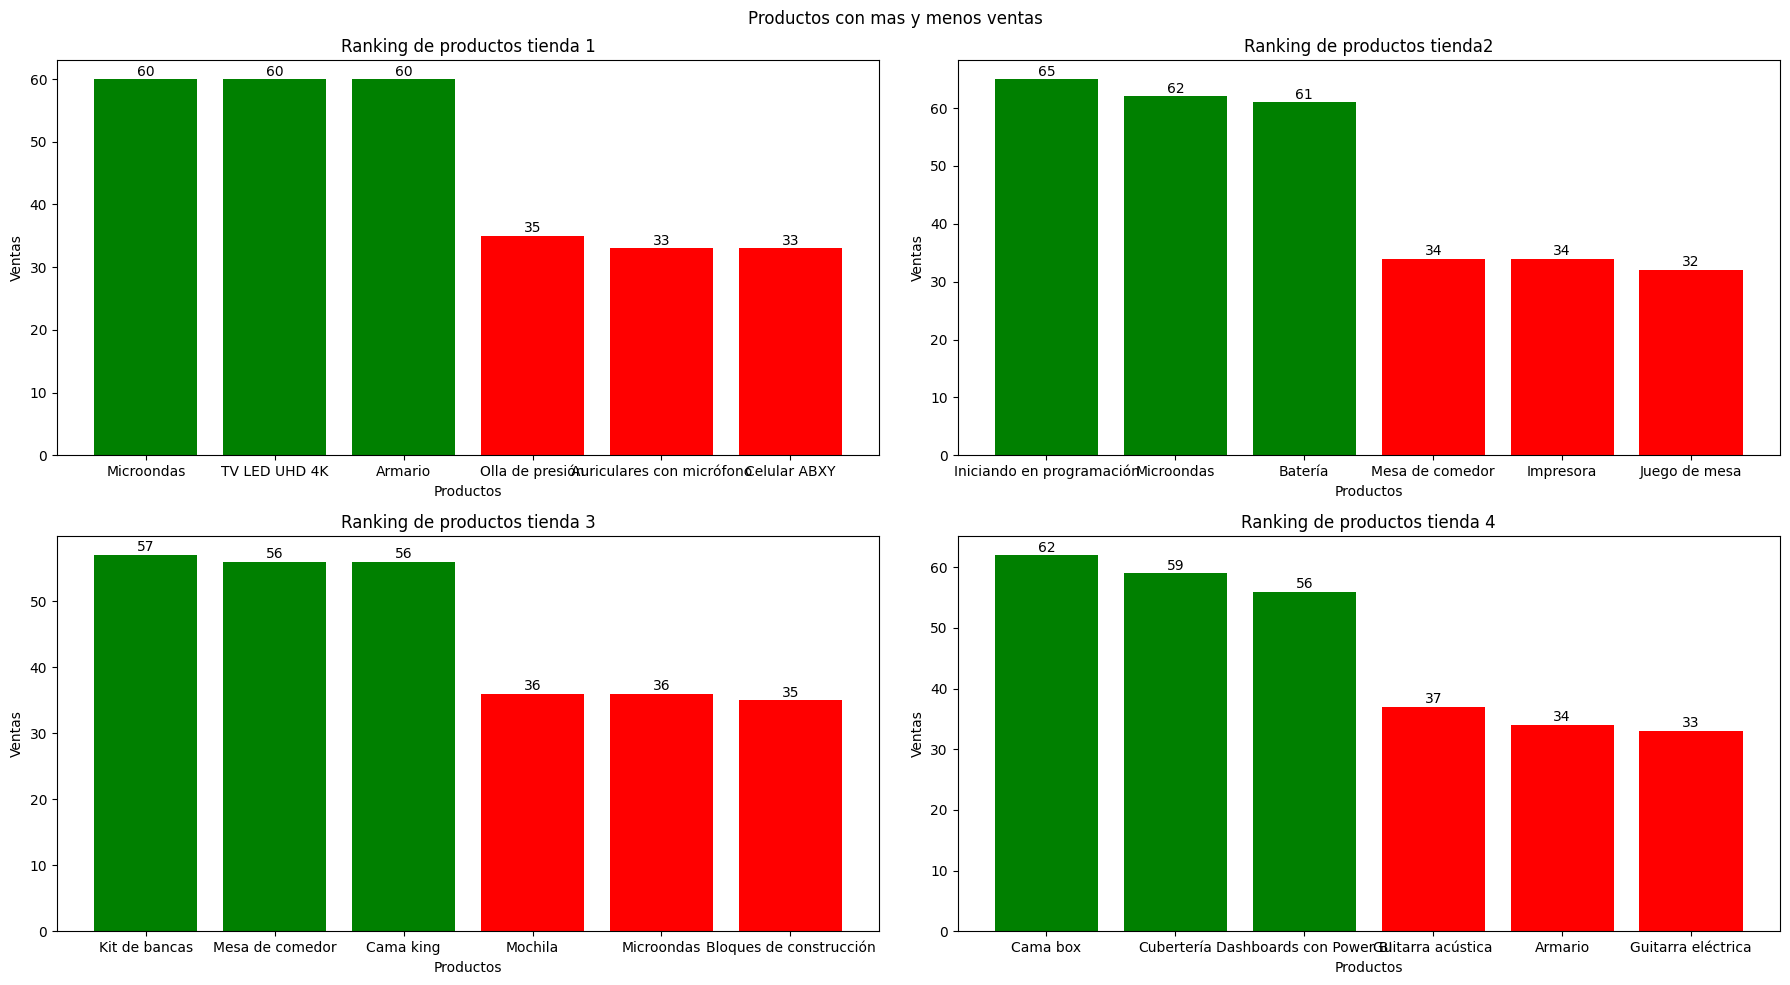

In [113]:
#creamos 4 espacios para poder comparar mejor
fig, axs = plt.subplots(2, 2, figsize = (18,10))
fig.suptitle('Productos con mas y menos ventas')

def grafico_productos(ax, mas_vendidos, menos_vendidos, titulo):
    productos = pd.concat([mas_vendidos, menos_vendidos])
    ax.bar(mas_vendidos.index, mas_vendidos.values, color = 'green')
    ax.bar(menos_vendidos.index, menos_vendidos.values, color = 'red')
    ax.set_title(titulo)
    ax.set_xlabel('Productos')
    ax.set_ylabel('Ventas')

    for i, (producto, valor) in enumerate(zip(productos.index, productos.values)):
        ax.text(i, valor + 0.1, f'{valor}', ha = 'center', va = 'bottom')


grafico_productos(axs[0,0], productos_mas_vendidos1, productos_menos_vendidos1, 'Ranking de productos tienda 1')
grafico_productos(axs[0,1], productos_mas_vendidos2, productos_menos_vendidos2, 'Ranking de productos tienda2')
grafico_productos(axs[1,0], productos_mas_vendidos3, productos_menos_vendidos3, 'Ranking de productos tienda 3')
grafico_productos(axs[1,1], productos_mas_vendidos4, productos_menos_vendidos4, 'Ranking de productos tienda 4')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [123]:
#se calcula el promedio de los costos de envío
costo_envio_tienda1 = round(tienda['Costo de envío'].mean(),)
costo_envio_tienda2 = round(tienda2['Costo de envío'].mean(),)
costo_envio_tienda3 = round(tienda3['Costo de envío'].mean(),)
costo_envio_tienda4 = round(tienda4['Costo de envío'].mean(),)


print(f'Costo de envío promedio de la tienda 1: {costo_envio_tienda1}')
print(f'Costo de envío promedio de la tienda 2: {costo_envio_tienda2}')
print(f'Costo de envío promedio de la tienda 3: {costo_envio_tienda3}')
print(f'Costo de envío promedio de la tienda 4: {costo_envio_tienda4}')

Costo de envío promedio de la tienda 1: 26019
Costo de envío promedio de la tienda 2: 25216
Costo de envío promedio de la tienda 3: 24806
Costo de envío promedio de la tienda 4: 23459


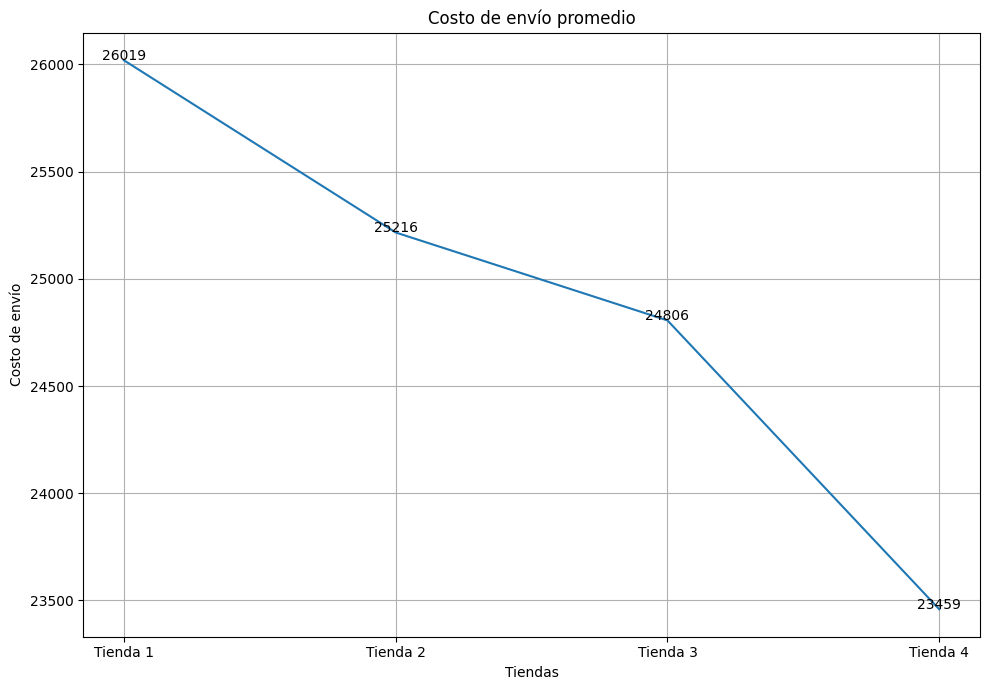

In [126]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio = [costo_envio_tienda1, costo_envio_tienda2, costo_envio_tienda3, costo_envio_tienda4]

plt.figure(figsize = (10,7))
plt.plot(tiendas, costos_envio)

plt.title('Costo de envío promedio')
plt.xlabel('Tiendas')
plt.ylabel('Costo de envío')

for i, costo in enumerate(costos_envio):
    plt.text(i, costo + 0.1, f'{costo}', ha = 'center')

plt.grid(True)
plt.tight_layout()
plt.show()


# ***Análisis Estratégico ***

Se nos planteo como objetivo, el realizar un análisis detallado, de las 4 tiendas de la cadena del señor Juan, esto con el objetivo de maximizar los recursos de la compañía.

Se esta valorando la opción de vender una de las 4 ubicaciones. Con el fin de ser lo más objetivo posible con la decisión, se consideraron los siguientes factores:

*   Los ingresos totales de las tiendas.
*   Las categorías de productos más y menos vendidas.

*   Las calificaciones promedio de los clientes por tienda.
*   Los productos más y menos vendidos.

*   El coste de envío promedio para cada tienda.

# ***Los principales hallazgos obtenidos fueron:***

Con respecto a la facturación acumulda por tienda, la tienda #1 es la que mayor ingresos genera, con ventas por más de 1 150,9 millones, mientras que la #4 es la que menos genera, con 1 038,4 millones, lo que representa un 9,8% menos de facturación, esta diferencia se puede observar en el grafico a continuación


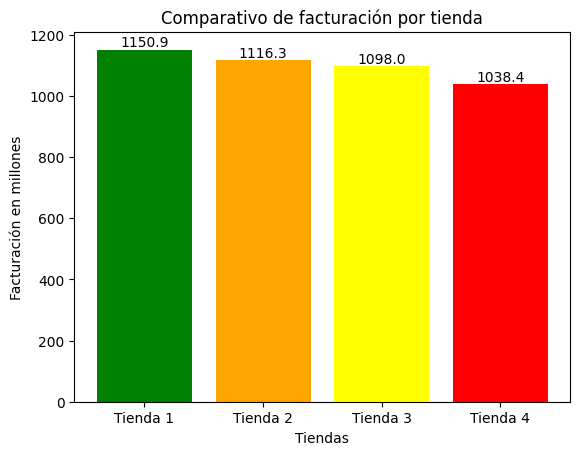



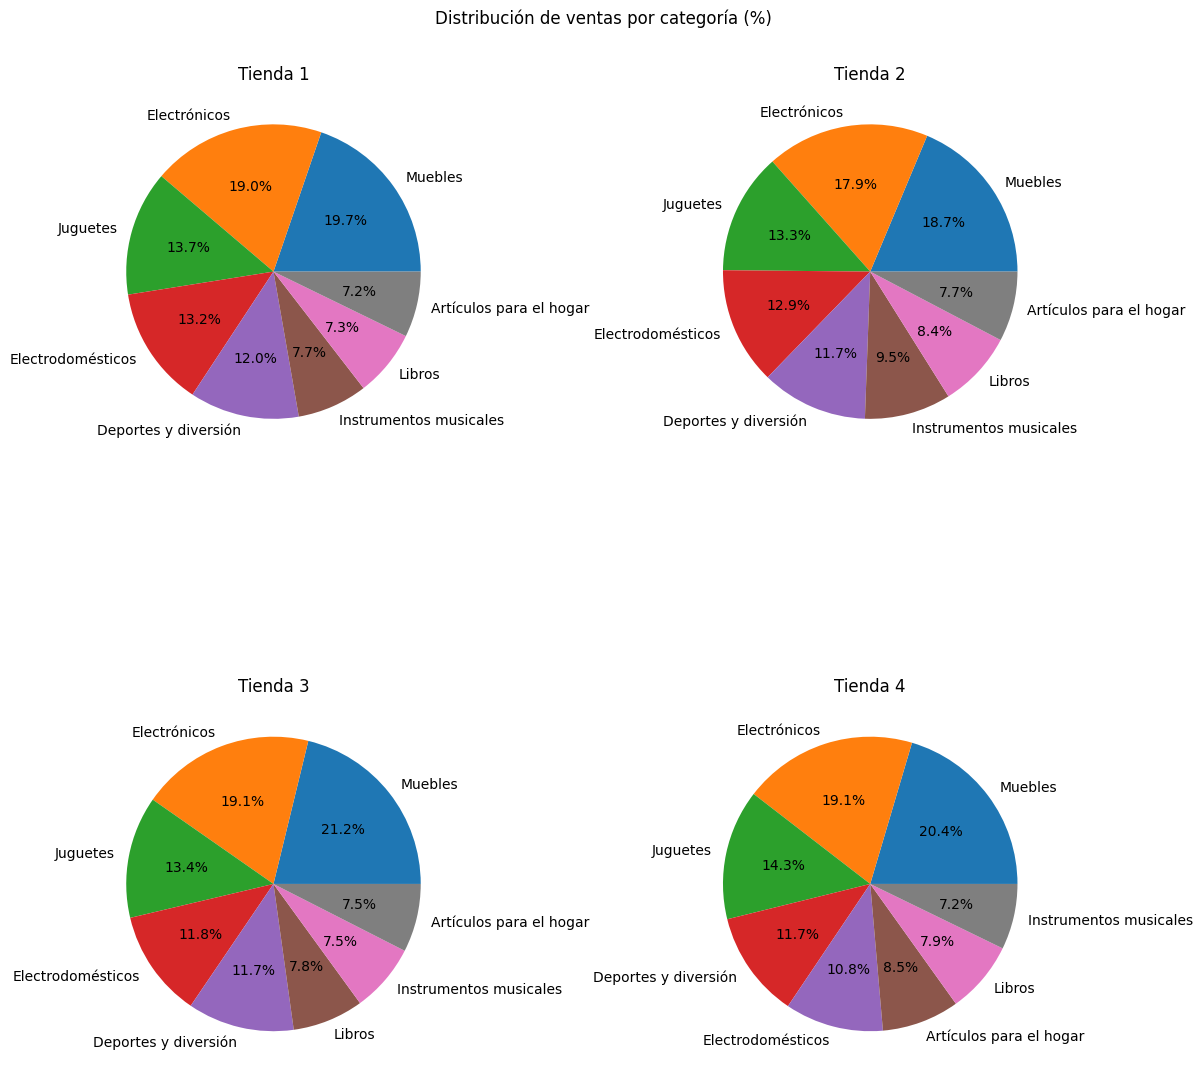

Con respecto a los categorias por productos en los 4 puntos se mantiene una distribución homogenia en donde las dos categorias con mayor volumenes de ventas son:


1.   Muebles
2.   Electrónicos


Otra variable, que tiene una gran relevancia, en la rentabilidad de una tienda, es el costo envió, ya que entre mayor sea este gasto menor sera la ganancia para la organización. Sin embargo, en esta análisis se logra apreciar como el gasto de envio mantiene una correlación directa con la facturación, en donde a menor nivel de facturación menor gasto de envio. Esto se puede observar claramente en donde la tienda #4 es la de menor facturación (-9,8% con respecto a la mejor), pero es la de menor gasto de envio (-9,8%), en la misma medida por los que se compenza.

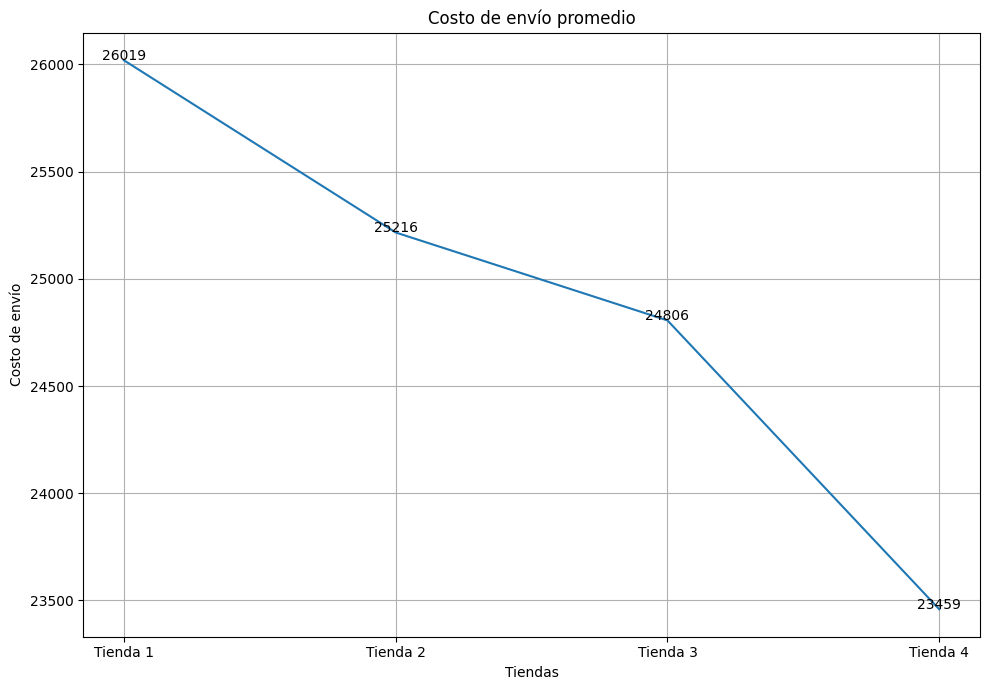

Por ultimo, considerando que la opinión de los clientes es una variable de peso para el creciemitno de una compañía, podemos observar como nuevamente la tienda #4 esta ranqueada entre las dos más bajas con una calificación de 4.00, por lo que la experiencia de los clientes no ha sido tan satisfactoria como en las otras tiendas.

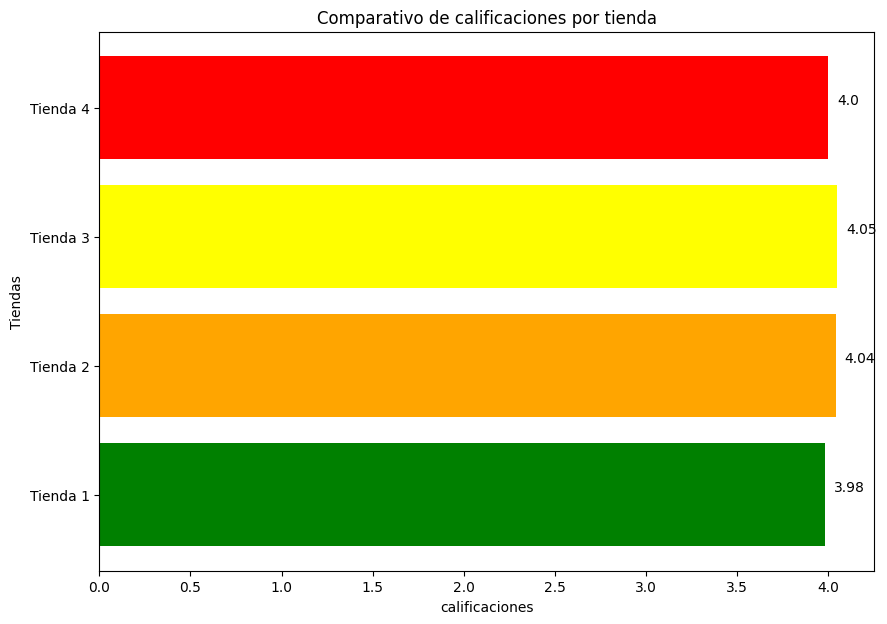


# ***Conclusión***

Tomando en cuenta todos los factores detallados y aunque la mayoria de las ubicaciones tiene un rendimiento muy similar le recomendamos al señor Juan, que si en un corto plazo no realiza un cambio de estrategia, podria vender la tienda #4, ya que es la que menos ingresos esta generando y es la segunda peor tienda en experiencia para los clientes, por los que una potencial venta podría maximizar los recursos de la compañía














